In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim

from collections import defaultdict
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

In [ ]:
!pip list

### 개발 환경 (패키지 버전)

Package                            Version
---------------------------------- ------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.6.0.33.42
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.3.0
audioread                          3.0.1
autograd                           1.7.0
babel                              2.16.0
backcall                           0.2.0
beautifulsoup4                     4.12.3
bigframes                          1.31.0
bigquery-magics                    0.5.0
bleach                             6.2.0
blinker                            1.9.0
blis                               0.7.11
blosc2                             2.7.1
bokeh                              3.6.2
Bottleneck                         1.4.2
bqplot                             0.12.44
branca                             0.8.1
CacheControl                       0.14.2
cachetools                         5.5.0
catalogue                          2.0.10
certifi                            2024.12.14
cffi                               1.17.1
chardet                            5.2.0
charset-normalizer                 3.4.1
chex                               0.1.88
clarabel                           0.9.0
click                              8.1.8
cloudpathlib                       0.20.0
cloudpickle                        3.1.0
cmake                              3.31.2
cmdstanpy                          1.2.5
colorcet                           3.1.0
colorlover                         0.3.0
colour                             0.1.5
community                          1.0.0b1
confection                         0.1.5
cons                               0.4.6
contourpy                          1.3.1
cryptography                       43.0.3
cuda-python                        12.2.1
cudf-cu12                          24.10.1
cufflinks                          0.17.3
cupy-cuda12x                       12.2.0
cvxopt                             1.3.2
cvxpy                              1.6.0
cycler                             0.12.1
cymem                              2.0.10
Cython                             3.0.11
dask                               2024.10.0
datascience                        0.17.6
db-dtypes                          1.3.1
dbus-python                        1.2.18
debugpy                            1.8.0
decorator                          4.4.2
defusedxml                         0.7.1
Deprecated                         1.2.15
diffusers                          0.32.1
distro                             1.9.0
dlib                               19.24.2
dm-tree                            0.1.8
docker-pycreds                     0.4.0
docstring_parser                   0.16
docutils                           0.21.2
dopamine_rl                        4.1.0
duckdb                             1.1.3
earthengine-api                    1.4.4
easydict                           1.13
editdistance                       0.8.1
eerepr                             0.0.4
einops                             0.8.0
en-core-web-sm                     3.7.1
entrypoints                        0.4
et_xmlfile                         2.0.0
etils                              1.11.0
etuples                            0.3.9
eval_type_backport                 0.2.2
exceptiongroup                     1.2.2
fastai                             2.7.18
fastcore                           1.7.28
fastdownload                       0.0.7
fastjsonschema                     2.21.1
fastprogress                       1.0.3
fastrlock                          0.8.3
filelock                           3.16.1
firebase-admin                     6.6.0
Flask                              3.1.0
flatbuffers                        24.12.23
flax                               0.10.2
folium                             0.19.4
fonttools                          4.55.3
frozendict                         2.4.6
frozenlist                         1.5.0
fsspec                             2024.10.0
future                             1.0.0
gast                               0.6.0
gcsfs                              2024.10.0
GDAL                               3.6.4
gdown                              5.2.0
geemap                             0.35.1
gensim                             4.3.3
geocoder                           1.38.1
geographiclib                      2.0
geopandas                          1.0.1
geopy                              2.4.1
gin-config                         0.5.0
gitdb                              4.0.12
GitPython                          3.1.44
glob2                              0.7
google                             2.0.3
google-ai-generativelanguage       0.6.10
google-api-core                    2.19.2
google-api-python-client           2.155.0
google-auth                        2.27.0
google-auth-httplib2               0.2.0
google-auth-oauthlib               1.2.1
google-cloud-aiplatform            1.74.0
google-cloud-bigquery              3.25.0
google-cloud-bigquery-connection   1.17.0
google-cloud-bigquery-storage      2.27.0
google-cloud-bigtable              2.27.0
google-cloud-core                  2.4.1
google-cloud-datastore             2.20.2
google-cloud-firestore             2.19.0
google-cloud-functions             1.19.0
google-cloud-iam                   2.17.0
google-cloud-language              2.16.0
google-cloud-pubsub                2.27.2
google-cloud-resource-manager      1.14.0
google-cloud-storage               2.19.0
google-cloud-translate             3.19.0
google-colab                       1.0.0
google-crc32c                      1.6.0
google-genai                       0.3.0
google-generativeai                0.8.3
google-pasta                       0.2.0
google-resumable-media             2.7.2
googleapis-common-protos           1.66.0
googledrivedownloader              0.4
graphviz                           0.20.3
greenlet                           3.1.1
grpc-google-iam-v1                 0.14.0
grpcio                             1.69.0
grpcio-status                      1.62.3
gspread                            6.1.4
gspread-dataframe                  4.0.0
gym                                0.25.2
gym-notices                        0.0.8
h11                                0.14.0
h5netcdf                           1.4.1
h5py                               3.12.1
holidays                           0.64
holoviews                          1.20.0
html5lib                           1.1
httpcore                           1.0.7
httpimport                         1.4.0
httplib2                           0.22.0
httpx                              0.28.1
huggingface-hub                    0.27.1
humanize                           4.11.0
hyperopt                           0.2.7
ibis-framework                     9.2.0
idna                               3.10
imageio                            2.36.1
imageio-ffmpeg                     0.5.1
imagesize                          1.4.1
imbalanced-learn                   0.13.0
imgaug                             0.4.0
immutabledict                      4.2.1
importlib_metadata                 8.5.0
importlib_resources                6.5.2
imutils                            0.5.4
inflect                            7.5.0
iniconfig                          2.0.0
intel-cmplr-lib-ur                 2025.0.4
intel-openmp                       2025.0.4
ipyevents                          2.0.2
ipyfilechooser                     0.6.0
ipykernel                          5.5.6
ipyleaflet                         0.19.2
ipyparallel                        8.8.0
ipython                            7.34.0
ipython-genutils                   0.2.0
ipython-sql                        0.5.0
ipytree                            0.2.2
ipywidgets                         7.7.1
itsdangerous                       2.2.0
jax                                0.4.33
jax-cuda12-pjrt                    0.4.33
jax-cuda12-plugin                  0.4.33
jaxlib                             0.4.33
jeepney                            0.7.1
jellyfish                          1.1.0
jieba                              0.42.1
Jinja2                             3.1.5
jiter                              0.8.2
joblib                             1.4.2
jsonpatch                          1.33
jsonpickle                         4.0.1
jsonpointer                        3.0.0
jsonschema                         4.23.0
jsonschema-specifications          2024.10.1
jupyter-client                     6.1.12
jupyter-console                    6.1.0
jupyter_core                       5.7.2
jupyter-leaflet                    0.19.2
jupyter-server                     1.24.0
jupyterlab_pygments                0.3.0
jupyterlab_widgets                 3.0.13
kaggle                             1.6.17
kagglehub                          0.3.6
keras                              3.5.0
keyring                            23.5.0
kiwisolver                         1.4.8
langchain                          0.3.14
langchain-core                     0.3.29
langchain-text-splitters           0.3.5
langcodes                          3.5.0
langsmith                          0.2.10
language_data                      1.3.0
launchpadlib                       1.10.16
lazr.restfulclient                 0.14.4
lazr.uri                           1.0.6
lazy_loader                        0.4
libclang                           18.1.1
libcudf-cu12                       24.10.1
librosa                            0.10.2.post1
lightgbm                           4.5.0
linkify-it-py                      2.0.3
llvmlite                           0.43.0
locket                             1.0.0
logical-unification                0.4.6
lxml                               5.3.0
marisa-trie                        1.2.1
Markdown                           3.7
markdown-it-py                     3.0.0
MarkupSafe                         3.0.2
matplotlib                         3.10.0
matplotlib-inline                  0.1.7
matplotlib-venn                    1.1.1
mdit-py-plugins                    0.4.2
mdurl                              0.1.2
miniKanren                         1.0.3
missingno                          0.5.2
mistune                            3.1.0
mizani                             0.13.1
mkl                                2025.0.1
ml-dtypes                          0.4.1
mlxtend                            0.23.3
more-itertools                     10.5.0
moviepy                            1.0.3
mpmath                             1.3.0
msgpack                            1.1.0
multidict                          6.1.0
multipledispatch                   1.0.0
multitasking                       0.0.11
murmurhash                         1.0.11
music21                            9.3.0
namex                              0.0.8
narwhals                           1.21.1
natsort                            8.4.0
nbclassic                          1.1.0
nbclient                           0.10.2
nbconvert                          7.16.5
nbformat                           5.10.4
ndindex                            1.9.2
nest-asyncio                       1.6.0
networkx                           3.4.2
nibabel                            5.3.2
nltk                               3.9.1
notebook                           6.5.5
notebook_shim                      0.2.4
numba                              0.60.0
numexpr                            2.10.2
numpy                              1.26.4
nvidia-cublas-cu12                 12.6.4.1
nvidia-cuda-cupti-cu12             12.6.80
nvidia-cuda-nvcc-cu12              12.6.85
nvidia-cuda-runtime-cu12           12.6.77
nvidia-cudnn-cu12                  9.6.0.74
nvidia-cufft-cu12                  11.3.0.4
nvidia-curand-cu12                 10.3.7.77
nvidia-cusolver-cu12               11.7.1.2
nvidia-cusparse-cu12               12.5.4.2
nvidia-nccl-cu12                   2.24.3
nvidia-nvjitlink-cu12              12.6.85
nvtx                               0.2.10
nx-cugraph-cu12                    24.10.0
oauth2client                       4.1.3
oauthlib                           3.2.2
openai                             1.59.4
opencv-contrib-python              4.10.0.84
opencv-python                      4.10.0.84
opencv-python-headless             4.10.0.84
openpyxl                           3.1.5
opentelemetry-api                  1.29.0
opentelemetry-sdk                  1.29.0
opentelemetry-semantic-conventions 0.50b0
opt_einsum                         3.4.0
optax                              0.2.4
optree                             0.13.1
orbax-checkpoint                   0.6.4
orjson                             3.10.13
osqp                               0.6.7.post3
packaging                          24.2
pandas                             2.2.2
pandas-datareader                  0.10.0
pandas-gbq                         0.26.1
pandas-stubs                       2.2.2.240909
pandocfilters                      1.5.1
panel                              1.5.5
param                              2.2.0
parso                              0.8.4
parsy                              2.1
partd                              1.4.2
pathlib                            1.0.1
patsy                              1.0.1
peewee                             3.17.8
peft                               0.14.0
pexpect                            4.9.0
pickleshare                        0.7.5
pillow                             11.1.0
pip                                24.1.2
platformdirs                       4.3.6
plotly                             5.24.1
plotnine                           0.14.5
pluggy                             1.5.0
ply                                3.11
polars                             1.9.0
pooch                              1.8.2
portpicker                         1.5.2
preshed                            3.0.9
prettytable                        3.12.0
proglog                            0.1.10
progressbar2                       4.5.0
prometheus_client                  0.21.1
promise                            2.3
prompt_toolkit                     3.0.48
propcache                          0.2.1
prophet                            1.1.6
proto-plus                         1.25.0
protobuf                           4.25.5
psutil                             5.9.5
psycopg2                           2.9.10
ptyprocess                         0.7.0
py-cpuinfo                         9.0.0
py4j                               0.10.9.7
pyarrow                            17.0.0
pyasn1                             0.6.1
pyasn1_modules                     0.4.1
pycocotools                        2.0.8
pycparser                          2.22
pydantic                           2.10.4
pydantic_core                      2.27.2
pydata-google-auth                 1.9.0
pydot                              3.0.4
pydotplus                          2.0.2
PyDrive                            1.3.1
PyDrive2                           1.21.3
pyerfa                             2.0.1.5
pygame                             2.6.1
pygit2                             1.16.0
Pygments                           2.18.0
PyGObject                          3.42.1
PyJWT                              2.10.1
pylibcudf-cu12                     24.10.1
pylibcugraph-cu12                  24.10.0
pylibraft-cu12                     24.10.0
pymc                               5.19.1
pymystem3                          0.2.0
pynvjitlink-cu12                   0.4.0
pyogrio                            0.10.0
Pyomo                              6.8.2
PyOpenGL                           3.1.7
pyOpenSSL                          24.2.1
pyparsing                          3.2.1
pyperclip                          1.9.0
pyproj                             3.7.0
pyshp                              2.3.1
PySocks                            1.7.1
pyspark                            3.5.4
pytensor                           2.26.4
pytest                             8.3.4
python-apt                         0.0.0
python-box                         7.3.0
python-dateutil                    2.8.2
python-louvain                     0.16
python-slugify                     8.0.4
python-utils                       3.9.1
pytz                               2024.2
pyviz_comms                        3.0.3
PyYAML                             6.0.2
pyzmq                              24.0.1
qdldl                              0.1.7.post5
ratelim                            0.1.6
referencing                        0.35.1
regex                              2024.11.6
requests                           2.32.3
requests-oauthlib                  1.3.1
requests-toolbelt                  1.0.0
requirements-parser                0.9.0
rich                               13.9.4
rmm-cu12                           24.10.0
rpds-py                            0.22.3
rpy2                               3.4.2
rsa                                4.9
safetensors                        0.5.1
scikit-image                       0.25.0
scikit-learn                       1.6.0
scipy                              1.13.1
scooby                             0.10.0
scs                                3.2.7.post2
seaborn                            0.13.2
SecretStorage                      3.3.1
Send2Trash                         1.8.3
sentence-transformers              3.3.1
sentencepiece                      0.2.0
sentry-sdk                         2.19.2
setproctitle                       1.3.4
setuptools                         75.1.0
shap                               0.46.0
shapely                            2.0.6
shellingham                        1.5.4
simple-parsing                     0.1.6
six                                1.17.0
sklearn-compat                     0.1.3
sklearn-pandas                     2.2.0
slicer                             0.0.8
smart-open                         7.1.0
smmap                              5.0.2
sniffio                            1.3.1
snowballstemmer                    2.2.0
soundfile                          0.13.0
soupsieve                          2.6
soxr                               0.5.0.post1
spacy                              3.7.5
spacy-legacy                       3.0.12
spacy-loggers                      1.0.5
Sphinx                             8.1.3
sphinxcontrib-applehelp            2.0.0
sphinxcontrib-devhelp              2.0.0
sphinxcontrib-htmlhelp             2.1.0
sphinxcontrib-jsmath               1.0.1
sphinxcontrib-qthelp               2.0.0
sphinxcontrib-serializinghtml      2.0.0
SQLAlchemy                         2.0.36
sqlglot                            25.1.0
sqlparse                           0.5.3
srsly                              2.5.0
stanio                             0.5.1
statsmodels                        0.14.4
stringzilla                        3.11.3
sympy                              1.13.1
tables                             3.10.1
tabulate                           0.9.0
tbb                                2022.0.0
tcmlib                             1.2.0
tenacity                           9.0.0
tensorboard                        2.17.1
tensorboard-data-server            0.7.2
tensorflow                         2.17.1
tensorflow-datasets                4.9.7
tensorflow-hub                     0.16.1
tensorflow-io-gcs-filesystem       0.37.1
tensorflow-metadata                1.13.1
tensorflow-probability             0.24.0
tensorstore                        0.1.71
termcolor                          2.5.0
terminado                          0.18.1
text-unidecode                     1.3
textblob                           0.17.1
tf_keras                           2.17.0
tf-slim                            1.1.0
thinc                              8.2.5
threadpoolctl                      3.5.0
tifffile                           2024.12.12
timm                               1.0.12
tinycss2                           1.4.0
tokenizers                         0.21.0
toml                               0.10.2
tomli                              2.2.1
toolz                              0.12.1
torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121
tornado                            6.3.3
tqdm                               4.67.1
traitlets                          5.7.1
traittypes                         0.2.1
transformers                       4.47.1
tweepy                             4.14.0
typeguard                          4.4.1
typer                              0.15.1
types-pytz                         2024.2.0.20241221
types-setuptools                   75.6.0.20241223
typing_extensions                  4.12.2
tzdata                             2024.2
tzlocal                            5.2
uc-micro-py                        1.0.3
umf                                0.9.1
uritemplate                        4.1.1
urllib3                            2.3.0
vega-datasets                      0.9.0
wadllib                            1.3.6
wandb                              0.19.1
wasabi                             1.1.3
wcwidth                            0.2.13
weasel                             0.4.1
webcolors                          24.11.1
webencodings                       0.5.1
websocket-client                   1.8.0
websockets                         14.1
Werkzeug                           3.1.3
wheel                              0.45.1
widgetsnbextension                 3.6.10
wordcloud                          1.9.4
wrapt                              1.17.0
xarray                             2025.1.0
xarray-einstats                    0.8.0
xgboost                            2.1.3
xlrd                               2.0.1
xyzservices                        2024.9.0
yarl                               1.18.3
yellowbrick                        1.5
yfinance                           0.2.51
zipp                               3.21.0

* 개발 환경 : 코랩 pro
* GPU : A100 (15GB 이상 필요)

# DATA 준비

In [2]:
# 랜덤 시드 고정 함수
def set_seed(seed):
    random.seed(seed)  # Python 랜덤 라이브러리 시드 고정
    np.random.seed(seed)  # NumPy 시드 고정
    torch.manual_seed(seed)  # PyTorch 시드 고정
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)  # GPU 시드 고정

        torch.cuda.manual_seed_all(seed)  # 멀티 GPU 사용 시 시드 고정
        torch.backends.cudnn.deterministic = True  # GPU 연산의 결정론적 동작 설정
        torch.backends.cudnn.benchmark = False  # 성능을 희생하고 결정론 보장

# 시드 값 설정
SEED = 42
set_seed(SEED)


## 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
folder_path = '/content/drive/MyDrive/Data/2.건설기계부문_data/train_data'
files = os.listdir(folder_path)

df_list = []  # 데이터프레임을 저장할 리스트

for file in files:
    file_path = os.path.join(folder_path, file)

    # 파일 이름의 첫 7글자로 데이터프레임 이름 생성
    df_name = file[:7] + '_df'

    # CSV 파일을 불러와서 데이터프레임으로 저장
    df = pd.read_csv(file_path)

    # driver 컬럼을 해당 운전자로 채움 (file[:7]의 마지막 문자)

    df['driver'] = df_name[-4]

    # label 컬럼을 파일 이름의 첫 3글자로 채움
    df['label'] = file[:3]

    # 데이터프레임을 리스트에 추가
    df_list.append(df)

# 모든 데이터프레임을 하나로 합침
data_df = pd.concat(df_list, ignore_index=True)

In [5]:
folder_path = '/content/drive/MyDrive/Data/2.건설기계부문_data/test_data'
files = os.listdir(folder_path)

df_list = []  # 데이터프레임을 저장할 리스트

for file in files:
    file_path = os.path.join(folder_path, file)

    # 파일 이름의 첫 7글자로 데이터프레임 이름 생성
    df_name = file[:7] + '_df'

    # CSV 파일을 불러와서 데이터프레임으로 저장
    df = pd.read_csv(file_path)

    # label 컬럼을 파일 이름의 첫 3글자로 채움
    df['label'] = file[-5:-4]

    # 데이터프레임을 리스트에 추가
    df_list.append(df)

# 모든 데이터프레임을 하나로 합침
test_df = pd.concat(df_list, ignore_index=True)

# 데이터 전처리 및 모델링

### 시간 정규화

In [6]:
# 데이터 불러오기
example_data = data_df

# 결과 저장을 위한 빈 데이터프레임
normalized_data = pd.DataFrame()

# 무게(label)별로 그룹화
unique_labels = example_data['label'].unique()

for label in unique_labels:
    label_data = example_data[example_data['label'] == label]

    # 운전자별로 처리
    drivers = label_data['driver'].unique()
    for driver in drivers:
        driver_data = label_data[label_data['driver'] == driver]

        # 드라이버 데이터를 복사하여 작업
        driver_data = driver_data.copy()

        # **시간 정규화**
        time_min = driver_data['Time[s]'].min()
        time_max = driver_data['Time[s]'].max()
        driver_data['Time[s]'] = (driver_data['Time[s]'] - time_min) / (time_max - time_min)

        # 정규화된 데이터를 결과 데이터프레임에 추가
        normalized_data = pd.concat([normalized_data, driver_data], ignore_index=True)

# 정규화 결과 확인
print("Time Range After Normalization:", normalized_data['Time[s]'].min(), normalized_data['Time[s]'].max())
print(normalized_data.head())


Time Range After Normalization: 0.0 1.0
    Time[s]    Signal A    Signal B    Signal C    Sensor A    Sensor B  \
0  0.000000  316.071968  316.071968  316.071968  674.237345  374.485206   
1  0.000041  316.071968  316.071968  316.071968  673.251840  374.288105   
2  0.000082  316.071968  316.071968  316.071968  672.380061  373.549989   
3  0.000123  316.071968  316.071968  316.071968  673.614732  372.435618   
4  0.000163  316.071968  316.071968  316.071968  673.220385  372.955849   

     Sensor C    Sensor D driver label  
0  316.071968  490.799284      A   102  
1  316.071968  490.427669      A   102  
2  316.071968  489.655534      A   102  
3  316.071968  489.653521      A   102  
4  316.071968  490.440253      A   102  


In [7]:
def standardize_data(data_df):
    """
    Sensor 및 Signal 데이터를 스탠다드 스케일링(Standard Scaling)으로 변환.
    """
    # Sensor and Signal columns
    signal_columns = ['Signal A', 'Signal B', 'Signal C']
    sensor_columns = ['Sensor A', 'Sensor B', 'Sensor C', 'Sensor D']

    # Standard scaling for Signal columns
    for column in signal_columns:
        mean = data_df[column].mean()
        std = data_df[column].std()
        data_df[column] = (data_df[column] - mean) / std

    # Standard scaling for Sensor columns
    for column in sensor_columns:
        mean = data_df[column].mean()
        std = data_df[column].std()
        data_df[column] = (data_df[column] - mean) / std

    return data_df

# 데이터프레임 불러오기
standardized_data_df = standardize_data(normalized_data)

# 결과 확인
print(standardized_data_df.head())


    Time[s]  Signal A  Signal B  Signal C  Sensor A  Sensor B  Sensor C  \
0  0.000000 -0.246781  0.071747 -0.000506  0.400598  0.331941 -0.859094   
1  0.000041 -0.246781  0.071747 -0.000506  0.385134  0.327750 -0.859094   
2  0.000082 -0.246781  0.071747 -0.000506  0.371456  0.312054 -0.859094   
3  0.000123 -0.246781  0.071747 -0.000506  0.390828  0.288358 -0.859094   
4  0.000163 -0.246781  0.071747 -0.000506  0.384641  0.299420 -0.859094   

   Sensor D driver label  
0 -0.536863      A   102  
1 -0.540720      A   102  
2 -0.548734      A   102  
3 -0.548755      A   102  
4 -0.540589      A   102  


### 학습용 데이터 전처리

In [8]:
def make_train_data(data_df, window_size=500, stride=1):
    train_sequences = []
    train_labels = []

    # Ensure label is in float format and sort by 'driver' and 'Time[s]'
    data_df['label'] = data_df['label'].astype(float)
    grouped_data = data_df.sort_values(['driver', 'Time[s]']).groupby(['driver', 'label'])

    # Sensor and Signal columns
    sensor_columns = ['Sensor A', 'Sensor B', 'Sensor C', 'Sensor D']
    signal_columns = ['Signal A', 'Signal B', 'Signal C']

    # Combine sensor and signal columns
    feature_columns = sensor_columns + signal_columns

    for (driver, label), group in grouped_data:
        label_data = label / 902.0

        # Extract sequences from each group
        for i in range(0, len(group) - window_size + 1, stride):
            window_data = group.iloc[i:i + window_size].copy()
            sequence = window_data[feature_columns].to_numpy()

            # Add to training data
            train_sequences.append(sequence)
            train_labels.append(label_data)

    return np.array(train_sequences), np.array(train_labels)

In [9]:
train_sequences, train_labels = make_train_data(standardized_data_df, window_size=1000, stride=10)

print(f"Train sequences shape: {train_sequences.shape}")
print(f"Train labels shape: {train_labels.shape}")

Train sequences shape: (17653, 1000, 7)
Train labels shape: (17653,)


In [10]:
# GPU 메모리 비우기 (필요할 때)
torch.cuda.empty_cache()

# 텐서로 변환 (학습 데이터만 포함)
train_sequences = torch.tensor(train_sequences, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.float32)

# DataLoader 생성
batch_size = 512

# 학습용 DataLoader
train_dataset = TensorDataset(train_sequences, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 학습 데이터 확인
print(f"Number of training samples: {len(train_dataset)}")

Number of training samples: 17653


### Training

In [11]:
class TransformerRegressor(nn.Module):
    def __init__(self, input_size, d_model, nhead, num_encoder_layers, dim_feedforward, output_size, dropout=0.1):
        super(TransformerRegressor, self).__init__()
        self.input_projection = nn.Linear(input_size, d_model)
        self.positional_encoding = nn.Parameter(torch.zeros(1, 1000, d_model))  # max sequence length is 500
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_encoder_layers)
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_size)
        seq_len = x.size(1)
        x = self.input_projection(x)  # (batch_size, seq_len, d_model)
        x += self.positional_encoding[:, :seq_len, :]
        x = x.permute(1, 0, 2)  # Transformer expects (seq_len, batch_size, d_model)
        x = self.transformer_encoder(x)  # (seq_len, batch_size, d_model)
        x = x.mean(dim=0)  # Global average pooling across sequence length
        x = self.fc(x)  # (batch_size, output_size)
        return x


In [12]:
# Initialize model parameters
input_size = train_sequences.shape[-1]
d_model = 128
nhead = 8
num_encoder_layers = 3
dim_feedforward = 256
output_size = 1
dropout = 0.2

In [13]:
# Model initialization
model = TransformerRegressor(input_size, d_model, nhead, num_encoder_layers, dim_feedforward, output_size, dropout).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Training configuration
criterion = nn.HuberLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 100
batch_size = 512
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming train_loader and test_loader are defined
model.train()
best_loss = float('inf')

for epoch in range(num_epochs):
    running_loss = 0.0
    with tqdm(train_loader, unit="batch") as tepoch:
        for inputs, labels in tepoch:
            tepoch.set_description(f"Epoch [{epoch + 1}/{num_epochs}]")

            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            tepoch.set_postfix(loss=loss.item())

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    # Save the best model
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        torch.save(model.state_dict(), "best_transformer_model.pth")
        print(f"Saved best model with loss {best_loss:.4f}")

print("Training completed.")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
Epoch [1/100]: 100%|██████████| 35/35 [00:26<00:00,  1.31batch/s, loss=0.0272]


Epoch [1/100], Loss: 0.0494
Saved best model with loss 0.0494


Epoch [2/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.0184]


Epoch [2/100], Loss: 0.0206
Saved best model with loss 0.0206


Epoch [3/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.0155]


Epoch [3/100], Loss: 0.0158
Saved best model with loss 0.0158


Epoch [4/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00977]


Epoch [4/100], Loss: 0.0124
Saved best model with loss 0.0124


Epoch [5/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00939]


Epoch [5/100], Loss: 0.0099
Saved best model with loss 0.0099


Epoch [6/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00777]


Epoch [6/100], Loss: 0.0079
Saved best model with loss 0.0079


Epoch [7/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.0056]


Epoch [7/100], Loss: 0.0063
Saved best model with loss 0.0063


Epoch [8/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00528]


Epoch [8/100], Loss: 0.0052
Saved best model with loss 0.0052


Epoch [9/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00437]


Epoch [9/100], Loss: 0.0042
Saved best model with loss 0.0042


Epoch [10/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00303]


Epoch [10/100], Loss: 0.0034
Saved best model with loss 0.0034


Epoch [11/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00225]


Epoch [11/100], Loss: 0.0029
Saved best model with loss 0.0029


Epoch [12/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00212]


Epoch [12/100], Loss: 0.0025
Saved best model with loss 0.0025


Epoch [13/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00159]


Epoch [13/100], Loss: 0.0021
Saved best model with loss 0.0021


Epoch [14/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.0014]


Epoch [14/100], Loss: 0.0018
Saved best model with loss 0.0018


Epoch [15/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00142]


Epoch [15/100], Loss: 0.0016
Saved best model with loss 0.0016


Epoch [16/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00134]


Epoch [16/100], Loss: 0.0014
Saved best model with loss 0.0014


Epoch [17/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00104]


Epoch [17/100], Loss: 0.0013
Saved best model with loss 0.0013


Epoch [18/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00103]


Epoch [18/100], Loss: 0.0012
Saved best model with loss 0.0012


Epoch [19/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00099]


Epoch [19/100], Loss: 0.0011
Saved best model with loss 0.0011


Epoch [20/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000982]


Epoch [20/100], Loss: 0.0010
Saved best model with loss 0.0010


Epoch [21/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000907]


Epoch [21/100], Loss: 0.0010
Saved best model with loss 0.0010


Epoch [22/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000694]


Epoch [22/100], Loss: 0.0009
Saved best model with loss 0.0009


Epoch [23/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000705]


Epoch [23/100], Loss: 0.0009


Epoch [24/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000731]


Epoch [24/100], Loss: 0.0008
Saved best model with loss 0.0008


Epoch [25/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000685]


Epoch [25/100], Loss: 0.0007
Saved best model with loss 0.0007


Epoch [26/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000493]


Epoch [26/100], Loss: 0.0007
Saved best model with loss 0.0007


Epoch [27/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000479]


Epoch [27/100], Loss: 0.0006
Saved best model with loss 0.0006


Epoch [28/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00066]


Epoch [28/100], Loss: 0.0006
Saved best model with loss 0.0006


Epoch [29/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000619]


Epoch [29/100], Loss: 0.0006
Saved best model with loss 0.0006


Epoch [30/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000509]


Epoch [30/100], Loss: 0.0006
Saved best model with loss 0.0006


Epoch [31/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000622]


Epoch [31/100], Loss: 0.0006


Epoch [32/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000599]


Epoch [32/100], Loss: 0.0005
Saved best model with loss 0.0005


Epoch [33/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00037]


Epoch [33/100], Loss: 0.0005
Saved best model with loss 0.0005


Epoch [34/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000494]


Epoch [34/100], Loss: 0.0005
Saved best model with loss 0.0005


Epoch [35/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000453]


Epoch [35/100], Loss: 0.0005
Saved best model with loss 0.0005


Epoch [36/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000317]


Epoch [36/100], Loss: 0.0004
Saved best model with loss 0.0004


Epoch [37/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000341]


Epoch [37/100], Loss: 0.0004
Saved best model with loss 0.0004


Epoch [38/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000352]


Epoch [38/100], Loss: 0.0004


Epoch [39/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000429]


Epoch [39/100], Loss: 0.0004
Saved best model with loss 0.0004


Epoch [40/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000282]


Epoch [40/100], Loss: 0.0004
Saved best model with loss 0.0004


Epoch [41/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000372]


Epoch [41/100], Loss: 0.0003
Saved best model with loss 0.0003


Epoch [42/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000376]


Epoch [42/100], Loss: 0.0004


Epoch [43/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00038]


Epoch [43/100], Loss: 0.0003
Saved best model with loss 0.0003


Epoch [44/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000347]


Epoch [44/100], Loss: 0.0003


Epoch [45/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000251]


Epoch [45/100], Loss: 0.0003
Saved best model with loss 0.0003


Epoch [46/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000259]


Epoch [46/100], Loss: 0.0003
Saved best model with loss 0.0003


Epoch [47/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000261]


Epoch [47/100], Loss: 0.0003


Epoch [48/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000257]


Epoch [48/100], Loss: 0.0003
Saved best model with loss 0.0003


Epoch [49/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000233]


Epoch [49/100], Loss: 0.0003


Epoch [50/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000257]


Epoch [50/100], Loss: 0.0003


Epoch [51/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000314]


Epoch [51/100], Loss: 0.0003
Saved best model with loss 0.0003


Epoch [52/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00037]


Epoch [52/100], Loss: 0.0003


Epoch [53/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00026]


Epoch [53/100], Loss: 0.0003
Saved best model with loss 0.0003


Epoch [54/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.00025]


Epoch [54/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [55/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000243]


Epoch [55/100], Loss: 0.0002


Epoch [56/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000224]


Epoch [56/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [57/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000291]


Epoch [57/100], Loss: 0.0002


Epoch [58/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000196]


Epoch [58/100], Loss: 0.0002


Epoch [59/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000204]


Epoch [59/100], Loss: 0.0002


Epoch [60/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000214]


Epoch [60/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [61/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00019]


Epoch [61/100], Loss: 0.0002


Epoch [62/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000226]


Epoch [62/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [63/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000245]


Epoch [63/100], Loss: 0.0002


Epoch [64/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000192]


Epoch [64/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [65/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000215]


Epoch [65/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [66/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000245]


Epoch [66/100], Loss: 0.0002


Epoch [67/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000185]


Epoch [67/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [68/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000175]


Epoch [68/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [69/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000176]


Epoch [69/100], Loss: 0.0002


Epoch [70/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000244]


Epoch [70/100], Loss: 0.0002


Epoch [71/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000167]


Epoch [71/100], Loss: 0.0002


Epoch [72/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000171]


Epoch [72/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [73/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000202]


Epoch [73/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [74/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000129]


Epoch [74/100], Loss: 0.0002


Epoch [75/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000149]


Epoch [75/100], Loss: 0.0002


Epoch [76/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000161]


Epoch [76/100], Loss: 0.0002


Epoch [77/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000152]


Epoch [77/100], Loss: 0.0002


Epoch [78/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000138]


Epoch [78/100], Loss: 0.0002


Epoch [79/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000156]


Epoch [79/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [80/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000142]


Epoch [80/100], Loss: 0.0002


Epoch [81/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000139]


Epoch [81/100], Loss: 0.0002


Epoch [82/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000159]


Epoch [82/100], Loss: 0.0002


Epoch [83/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000145]


Epoch [83/100], Loss: 0.0002
Saved best model with loss 0.0002


Epoch [84/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000141]


Epoch [84/100], Loss: 0.0002


Epoch [85/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00015]


Epoch [85/100], Loss: 0.0001
Saved best model with loss 0.0001


Epoch [86/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000134]


Epoch [86/100], Loss: 0.0001
Saved best model with loss 0.0001


Epoch [87/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000162]


Epoch [87/100], Loss: 0.0002


Epoch [88/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000136]


Epoch [88/100], Loss: 0.0002


Epoch [89/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000146]


Epoch [89/100], Loss: 0.0001


Epoch [90/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000143]


Epoch [90/100], Loss: 0.0001


Epoch [91/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000108]


Epoch [91/100], Loss: 0.0001


Epoch [92/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000184]


Epoch [92/100], Loss: 0.0001
Saved best model with loss 0.0001


Epoch [93/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00011]


Epoch [93/100], Loss: 0.0001
Saved best model with loss 0.0001


Epoch [94/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000167]


Epoch [94/100], Loss: 0.0001


Epoch [95/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000113]


Epoch [95/100], Loss: 0.0001


Epoch [96/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000126]


Epoch [96/100], Loss: 0.0001


Epoch [97/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.000133]


Epoch [97/100], Loss: 0.0001


Epoch [98/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000117]


Epoch [98/100], Loss: 0.0001


Epoch [99/100]: 100%|██████████| 35/35 [00:25<00:00,  1.35batch/s, loss=0.000131]


Epoch [99/100], Loss: 0.0002


Epoch [100/100]: 100%|██████████| 35/35 [00:25<00:00,  1.36batch/s, loss=0.00012]

Epoch [100/100], Loss: 0.0001
Training completed.


# TEST

In [14]:
# 테스트 데이터 불러오기
test_data = test_df.copy()

# 결과 저장을 위한 빈 데이터프레임
normalized_test_data = pd.DataFrame()

# 레이블별로 그룹화하여 시간 정규화
unique_labels = test_data['label'].unique()

for label in unique_labels:
    label_data = test_data[test_data['label'] == label].copy()

    # **시간 정규화**
    time_min = label_data['Time[s]'].min()
    time_max = label_data['Time[s]'].max()
    label_data['Time[s]'] = (label_data['Time[s]'] - time_min) / (time_max - time_min)

    # 정규화된 데이터를 결과 데이터프레임에 추가
    normalized_test_data = pd.concat([normalized_test_data, label_data], ignore_index=True)

In [15]:
def normalize_data(data_df):
    """
    Normalize the data using standard scaling (z-score normalization).
    """
    # Sensor and Signal columns
    signal_columns = ['Signal A', 'Signal B', 'Signal C']
    sensor_columns = ['Sensor A', 'Sensor B', 'Sensor C', 'Sensor D']

    # Standard scaling for Signal columns (individual scaling)
    for column in signal_columns:
        mean_value = data_df[column].mean()
        std_value = data_df[column].std()
        data_df[column] = (data_df[column] - mean_value) / std_value

    # Standard scaling for Sensor columns (individual scaling)
    for column in sensor_columns:
        mean_value = data_df[column].mean()
        std_value = data_df[column].std()
        data_df[column] = (data_df[column] - mean_value) / std_value

    return data_df

# 데이터프레임 불러오기
test_normalized_test_data = normalize_data(normalized_test_data)


In [16]:
def make_test_data(data_df, window_size=3000, stride=5):
    test_sequences = []
    test_labels = []

    # Ensure label is in float format and sort by 'Time[s]'
    data_df['label'] = data_df['label'].astype(float)
    grouped_data = data_df.sort_values(['Time[s]']).groupby('label')

    # Sensor and Signal columns
    sensor_columns = ['Sensor A', 'Sensor B', 'Sensor C', 'Sensor D']
    signal_columns = ['Signal A', 'Signal B', 'Signal C']

    # Combine sensor and signal columns
    feature_columns = sensor_columns + signal_columns

    for label, group in grouped_data:
        label_data = label / 902.0  # Scale label

        # Extract sequences from each group
        for i in range(0, len(group) - window_size + 1, stride):
            window_data = group.iloc[i:i + window_size].copy()

            # Select sensor and signal columns
            sequence = window_data[feature_columns].to_numpy()

            # Append to test data
            test_sequences.append(sequence)
            test_labels.append(label_data)

    return np.array(test_sequences), np.array(test_labels)


In [17]:
# 사용 예시
window_size = 1000
stride = 10

# Test 데이터를 생성합니다.
test_sequences, test_labels = make_test_data(normalized_test_data, window_size=window_size, stride=stride)

In [18]:
# 텐서로 변환
test_sequences = torch.tensor(test_sequences, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.float32)

# DataLoader 생성
batch_size = 512
test_dataset = TensorDataset(test_sequences, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Test Loader created with {len(test_loader)} batches.")

Test Loader created with 15 batches.


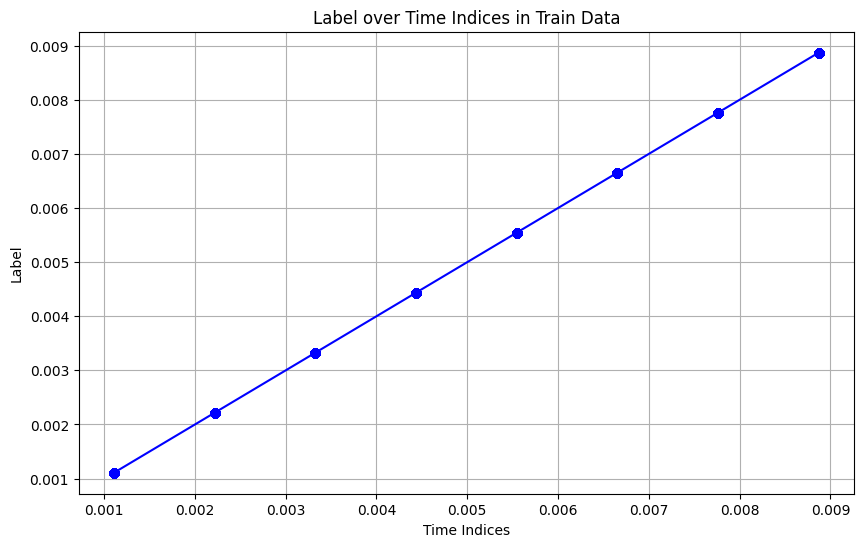

In [19]:
# 각 시퀀스의 타임스텝을 가상의 시간 인덱스로 사용
time_indices = range(len(test_labels))  # 시퀀스 순서에 따른 시간 인덱스

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(test_labels, test_labels.numpy(), marker='o', linestyle='-', color='b')
plt.title('Label over Time Indices in Train Data')
plt.xlabel('Time Indices')
plt.ylabel('Label')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
<ipython-input-20-ff13dfc5e370>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you st

Loaded best model from best_transformer_model.pth


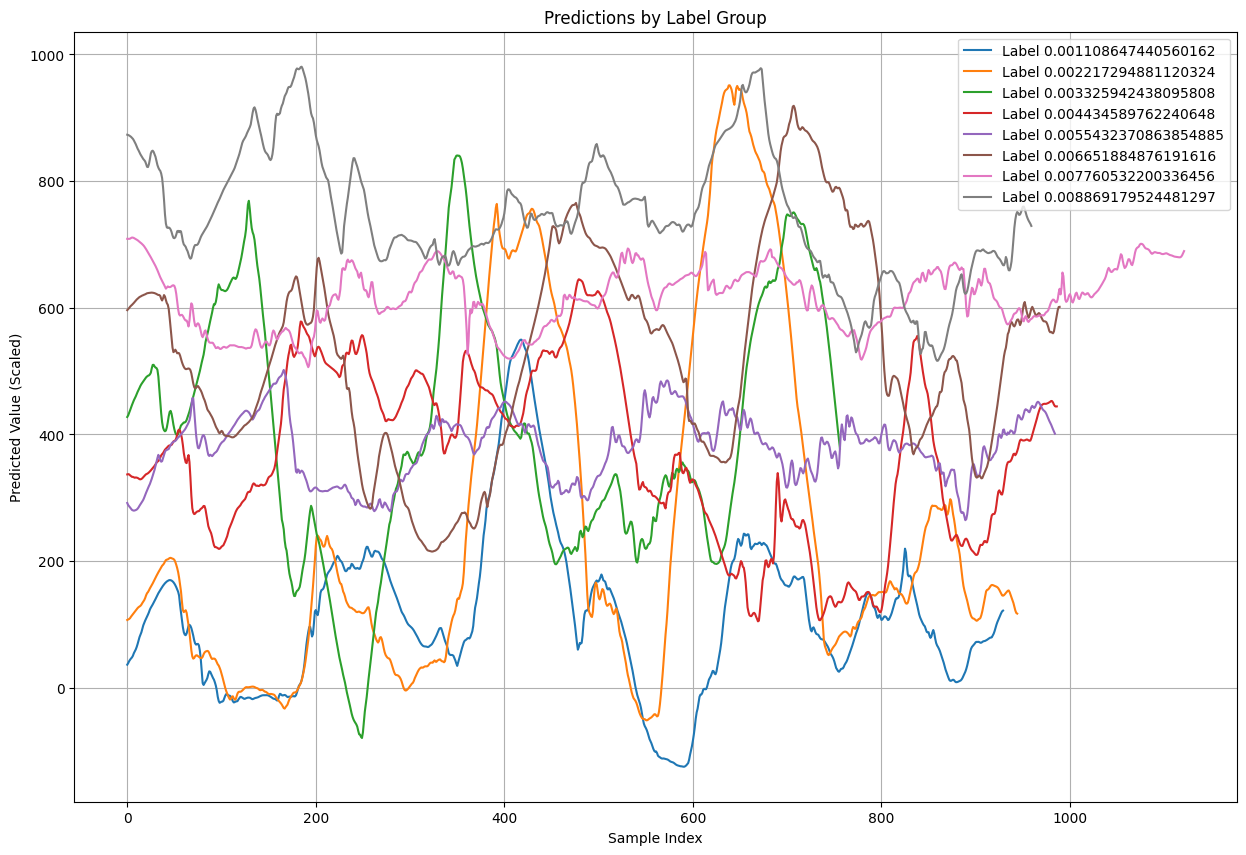

In [20]:
# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 초기화
model = TransformerRegressor(
    input_size=input_size,
    d_model=d_model,
    nhead=nhead,
    num_encoder_layers=num_encoder_layers,
    dim_feedforward=dim_feedforward,
    output_size=output_size,
    dropout=dropout
).to(device)

best_model_path ='best_transformer_model.pth'

# 저장된 모델 로드
model.load_state_dict(torch.load(best_model_path))
print(f"Loaded best model from {best_model_path}")

# 모델을 평가 모드로 전환
model.eval()
predictions_by_label = defaultdict(list)  # 레이블별 예측값 저장

# 테스트 데이터에 대한 예측 수행
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)

        # 모델 예측
        outputs = model(inputs)
        # 예측값을 레이블별로 그룹화
        for pred, label in zip(outputs.squeeze(1).cpu().numpy(), labels.cpu().numpy()):
            predictions_by_label[label].append(pred * 902.0)  # 필요 시 스케일링 값을 수정

# 레이블별 예측값 정리 및 시각화
plt.figure(figsize=(15, 10))
for label, preds in predictions_by_label.items():
    plt.plot(preds, label=f"Label {label}")

plt.title("Predictions by Label Group")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Value (Scaled)")
plt.legend()
plt.grid()
plt.show()

# 레이블별 예측값 요약 출력
for label, preds in predictions_by_label.items():
    print(f"Label {label}:")
    print(f"  Number of Predictions: {len(preds)}")
    print(f"  Mean Prediction: {np.mean(preds):.4f}")
    print(f"  Std Dev of Predictions: {np.std(preds):.4f}")


<ipython-input-22-3a4cc0eba9e8>:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Loaded best model from best_transformer_model.pth


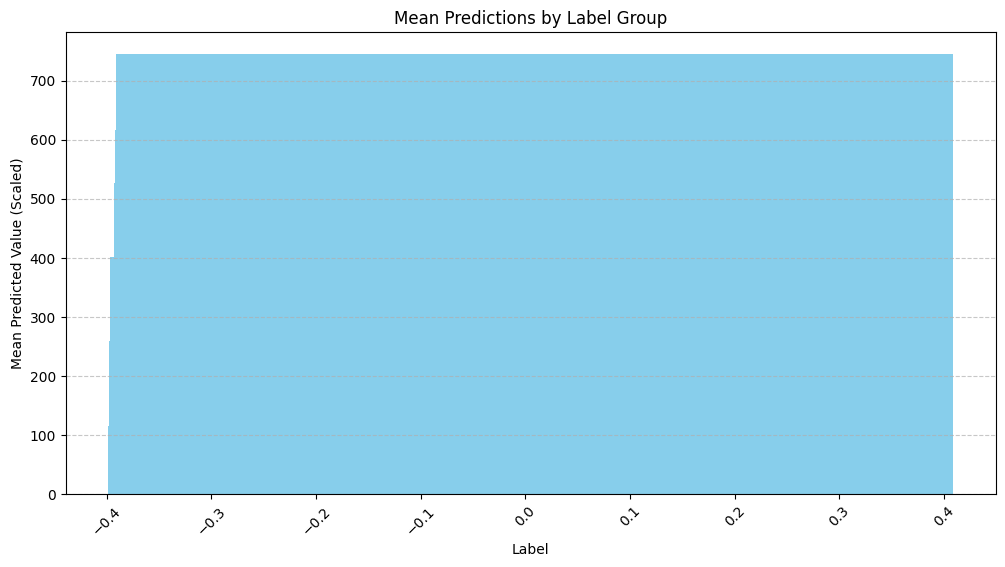

Label-wise Mean Predictions:
Label 0.001108647440560162: 114.5153
Label 0.002217294881120324: 259.5924
Label 0.003325942438095808: 401.8528
Label 0.004434589762240648: 367.0292
Label 0.0055432370863854885: 379.5762
Label 0.006651884876191616: 526.7149
Label 0.007760532200336456: 616.3560
Label 0.008869179524481297: 744.8244


In [22]:
# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 초기화
model = TransformerRegressor(
    input_size=input_size,
    d_model=d_model,
    nhead=nhead,
    num_encoder_layers=num_encoder_layers,
    dim_feedforward=dim_feedforward,
    output_size=output_size,
    dropout=dropout
).to(device)

best_model_path ='best_transformer_model.pth'

# 저장된 모델 로드
model.load_state_dict(torch.load(best_model_path))
print(f"Loaded best model from {best_model_path}")

# 모델을 평가 모드로 전환
model.eval()
predictions_by_label = defaultdict(list)  # 레이블별 예측값 저장

# 테스트 데이터에 대한 예측 수행
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)

        # 모델 예측
        outputs = model(inputs)

        # 예측값을 레이블별로 그룹화
        for pred, label in zip(outputs.squeeze(1).cpu().numpy(), labels.cpu().numpy()):
            predictions_by_label[label].append(pred * 902.0)  # 필요 시 스케일링 값을 수정

# 레이블별 평균 예측값 계산
label_means = {}
for label, preds in predictions_by_label.items():
    label_means[label] = np.mean(preds)

# 레이블별 평균 예측값 시각화
plt.figure(figsize=(12, 6))
labels = list(label_means.keys())
mean_predictions = list(label_means.values())

plt.bar(labels, mean_predictions, color="skyblue")
plt.title("Mean Predictions by Label Group")
plt.xlabel("Label")
plt.ylabel("Mean Predicted Value (Scaled)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 레이블별 평균값 출력
print("Label-wise Mean Predictions:")
for label, mean_pred in label_means.items():
    print(f"Label {label}: {mean_pred:.4f}")

### 제출

In [23]:
submission = pd.read_csv('/content/drive/MyDrive/Data/sample_submission_02건설기계.csv', encoding='cp949')

In [24]:
submission

,id,ans
0,B운전자데이터_1.csv,0
1,B운전자데이터_2.csv,0
2,B운전자데이터_3.csv,0
3,B운전자데이터_4.csv,0
4,B운전자데이터_5.csv,0
5,B운전자데이터_6.csv,0
6,B운전자데이터_7.csv,0
7,B운전자데이터_8.csv,0


In [25]:
# 원래 레이블 리스트를 숫자형으로 변환
original_labels_list = sorted(test_df['label'].astype(float).unique())  # 원래 레이블들 (스케일링 전)

# 스케일링된 레이블을 원래 값으로 복원하면서 가장 가까운 원래 레이블을 찾음
label_means_mapped = {}
for scaled_label, mean_pred in label_means.items():
    # 복원된 레이블 값
    restored_label = scaled_label * 902.0

    # 원래 레이블 리스트에서 가장 가까운 값 찾기
    closest_label = min(original_labels_list, key=lambda x: abs(x - restored_label))

    # 매핑
    label_means_mapped[closest_label] = mean_pred

# 출력
print("Mapped Label-wise Mean Predictions (to Original Labels):")
for label, mean_pred in label_means_mapped.items():
    print(f"Label {label}: {mean_pred:.4f}")

# submission 데이터프레임에 매핑
for label, mean_pred in label_means_mapped.items():
    # id에서 숫자를 추출해 매핑
    submission.loc[submission['id'].str.extract(r'(\d+)')[0].astype(int) == int(label), 'ans'] = mean_pred

# 결과 확인
print(submission.head())

Mapped Label-wise Mean Predictions (to Original Labels):
Label 1.0: 114.5153
Label 2.0: 259.5924
Label 3.0: 401.8528
Label 4.0: 367.0292
Label 5.0: 379.5762
Label 6.0: 526.7149
Label 7.0: 616.3560
Label 8.0: 744.8244
              id         ans
0  B운전자데이터_1.csv  114.515272
1  B운전자데이터_2.csv  259.592431
2  B운전자데이터_3.csv  401.852762
3  B운전자데이터_4.csv  367.029157
4  B운전자데이터_5.csv  379.576198


<ipython-input-25-1a2b7d46f470>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '114.51527232397548' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  submission.loc[submission['id'].str.extract(r'(\d+)')[0].astype(int) == int(label), 'ans'] = mean_pred


In [26]:
# 최종 서브미션 파일 저장
submission.to_csv('sample_submission_02건설기계.csv', index=False, encoding='utf-8-sig')
print("Submission file saved as 'sample_submission_02건설기계.csv'")

Submission file saved as 'sample_submission_02건설기계.csv'
